In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Paths
train_path = Path("../data/processed/train.csv")
val_path = Path("../data/processed/val.csv")
test_path = Path("../data/processed/test.csv")

# Load
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

train_df.head()


,text,generated,label
0,I can assure you that the Face on Mars is just...,0.0,Human
1,The Facial Action Coding System (FACS) is a wa...,1.0,AI
2,I recently had the chance to get to know someo...,1.0,AI
3,I believe that individuals should make their o...,1.0,AI
4,"Dear Florida State Senator, The Electoral Coll...",0.0,Human


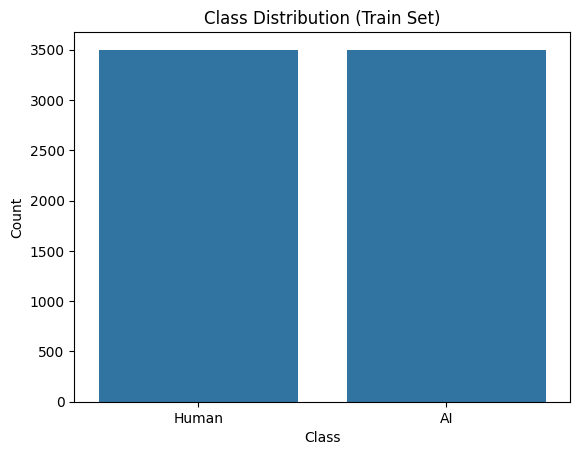

In [10]:
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution (Train Set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


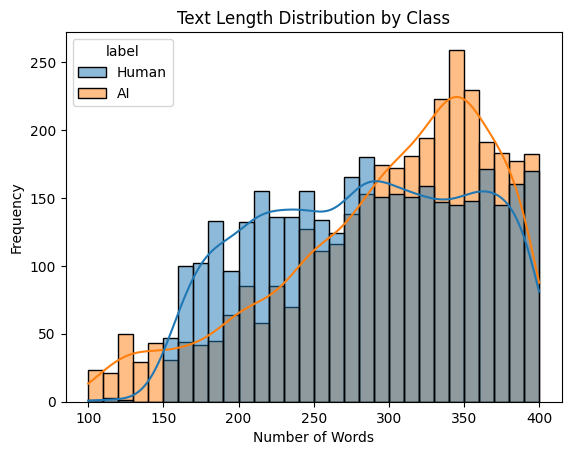

In [11]:
train_df['length'] = train_df['text'].str.split().str.len()

sns.histplot(data=train_df, x='length', hue='label', bins=30, kde=True)
plt.title("Text Length Distribution by Class")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [12]:
print("=== AI Sample ===")
print(train_df[train_df['label'] == 'AI']['text'].iloc[0])

print("\n=== Human Sample ===")
print(train_df[train_df['label'] == 'Human']['text'].iloc[0])


=== AI Sample ===
The Facial Action Coding System (FACS) is a way of categorizing and analyzing facial expressions. This system was created by Dr. Paul Ekman, a renowned psychologist and expert on emotional recognition, and Dr. Wallace Friesen. FACS helps researchers study human emotions, communication, and psychology in an organized manner. FACS uses specific labels to describe various movements and actions in a person's facial muscles. These labels are called action units (AUs) and there are currently 43 AUs recognized in the system. These action units are divided into seven different categories: 1. Inner Brow Raiser (AU1) 2. Inner Lip Corner Raiser (AU2) 3. Outer Brow Raiser (AU4) 4. Nasolabial Raiser (AU5) 5. Upper Lip Corner Depressor (AU6) 6. Chin Raise (AU7) 7. Lip Corner Puller (AU12) These categories are further subdivided into sub-actions, which are smaller facial movements. For instance, AU11 is an inner lip corner puller, which is a smaller movement than AU1 (inner brow rai

In [16]:


# Use the already loaded train_df for exploration
train_df.head()
train_df.info()
train_df['label'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       7000 non-null   object 
 1   generated  7000 non-null   float64
 2   label      7000 non-null   object 
 3   length     7000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 218.9+ KB


label
Human    3500
AI       3500
Name: count, dtype: int64

In [15]:
import os
print(os.getcwd())

c:\Users\Admin\OneDrive\Desktop\ai vs human\notebooks


In [18]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)       # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)    # keep only letters
    text = re.sub(r'\s+', ' ', text)        # remove extra spaces
    return text.strip()

train_df['text'] = train_df['text'].apply(clean_text)

# Drop duplicates
train_df = train_df.drop_duplicates(subset='text').reset_index(drop=True)


In [20]:
train_df['id'] = range(1, len(train_df) + 1)
train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['source'] = train_df['label'].apply(lambda x: 'collected_AI' if x == 'AI' else 'collected_Human')
train_df['prompt'] = ""       # fill if available
train_df['model_name'] = ""   # fill if AI text has model info


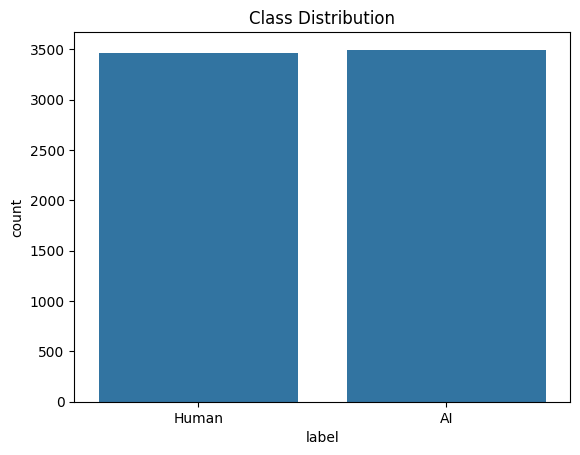

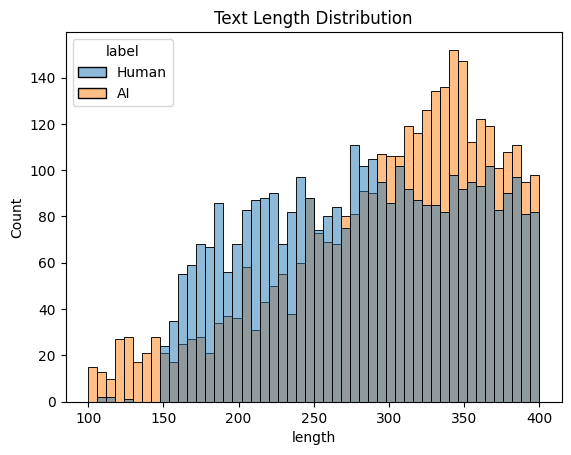

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

sns.histplot(data=train_df, x='length', hue='label', bins=50)
plt.title("Text Length Distribution")
plt.show()


In [23]:
# Check missing values in train, val, and test
print("Train missing values:\n", train_df.isnull().sum())
print("\nValidation missing values:\n", val_df.isnull().sum())
print("\nTest missing values:\n", test_df.isnull().sum())


Train missing values:
 text          0
generated     0
label         0
length        0
id            0
source        0
prompt        0
model_name    0
dtype: int64

Validation missing values:
 text         0
generated    0
label        0
dtype: int64

Test missing values:
 text         0
generated    0
label        0
dtype: int64


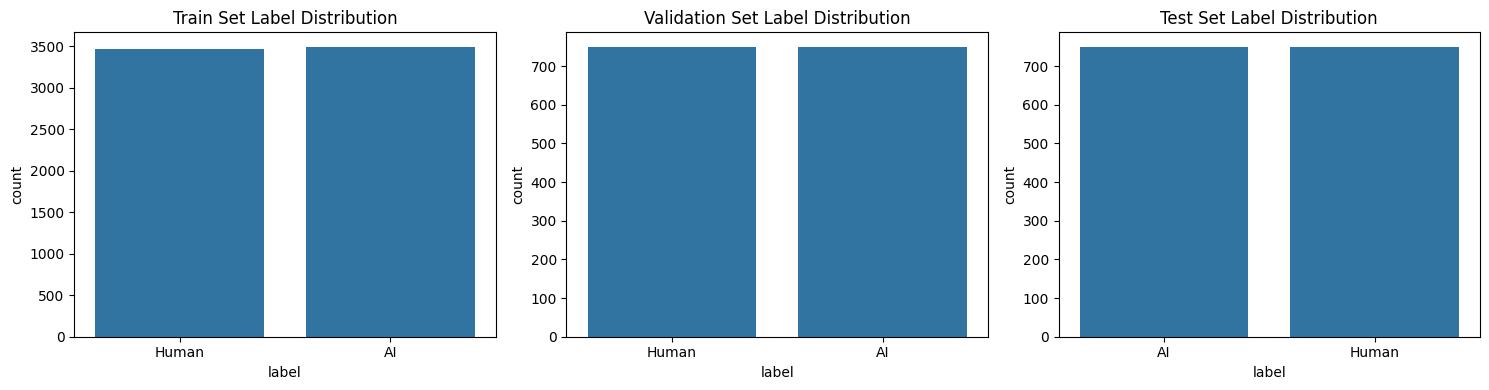

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(x='label', data=train_df, ax=axes[0])
axes[0].set_title("Train Set Label Distribution")

sns.countplot(x='label', data=val_df, ax=axes[1])
axes[1].set_title("Validation Set Label Distribution")

sns.countplot(x='label', data=test_df, ax=axes[2])
axes[2].set_title("Test Set Label Distribution")

plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud

# Generate word cloud for AI texts
ai_text = " ".join(train_df[train_df['label'] == 'AI']['text'])
human_text = " ".join(train_df[train_df['label'] == 'Human']['text'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wc_ai = WordCloud(width=800, height=400, background_color='white').generate(ai_text)
plt.imshow(wc_ai, interpolation='bilinear')
plt.axis('off')
plt.title("AI Text Word Cloud")

plt.subplot(1, 2, 2)
wc_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plt.imshow(wc_human, interpolation='bilinear')
plt.axis('off')
plt.title("Human Text Word Cloud")

plt.show()


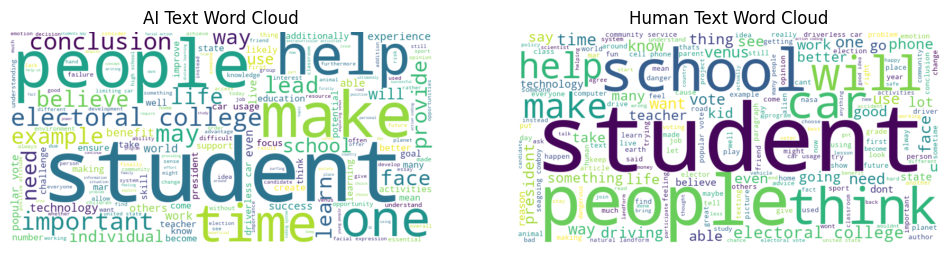

In [28]:

from wordcloud import WordCloud

# Generate word cloud for AI texts
ai_text = " ".join(train_df[train_df['label'] == 'AI']['text'])
human_text = " ".join(train_df[train_df['label'] == 'Human']['text'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wc_ai = WordCloud(width=800, height=400, background_color='white').generate(ai_text)
plt.imshow(wc_ai, interpolation='bilinear')
plt.axis('off')
plt.title("AI Text Word Cloud")

plt.subplot(1, 2, 2)
wc_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plt.imshow(wc_human, interpolation='bilinear')
plt.axis('off')
plt.title("Human Text Word Cloud")

plt.show()


In [29]:
# Text length stats
print(train_df['length'].describe())

# Very short texts
short_texts = train_df[train_df['length'] < 3]
print(f"\nShort texts (<3 words): {len(short_texts)}")
print(short_texts['text'].head())

# Very long texts
long_texts = train_df[train_df['length'] > 100]
print(f"\nLong texts (>100 words): {len(long_texts)}")
print(long_texts['text'].head())


count    6959.000000
mean      290.151746
std        69.961863
min       100.000000
25%       239.000000
50%       299.000000
75%       348.000000
max       400.000000
Name: length, dtype: float64

Short texts (<3 words): 0
Series([], Name: text, dtype: object)

Long texts (>100 words): 6957
0    i can assure you that the face on mars is just...
1    the facial action coding system facs is a way ...
2    i recently had the chance to get to know someo...
3    i believe that individuals should make their o...
4    dear florida state senator the electoral colle...
Name: text, dtype: object


In [ ]:
# # ---
# # # Week 2: Baseline & Transformer Embedding Results
# # ---

# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# from IPython.display import display, Image

# # Load SBERT results
# with open("../reports/sbert_results.json") as f:
#     sbert = json.load(f)

# # Load Transformer v2 results
# with open("../reports/transformer_emb_results_v2.json") as f:
#     transformer = json.load(f)

# # Extract metrics
# sbert_test = sbert.get("test", sbert)
# transformer_test = transformer.get("test", transformer)

# # Comparison table
# df = pd.DataFrame({
#     "SBERT (Baseline)": sbert_test,
#     "Transformer v2": transformer_test
# })
# display(df)

# # ---
# # ## Confusion Matrices
# # ---
# print("\nConfusion Matrices (Validation & Test)")
# display(Image("../reports/cm_transformer_val.png"))
# display(Image("../reports/cm_transformer_test.png"))

# # ---
# # ## ROC Curves
# # ---
# print("\nROC Curves (Validation & Test)")
# display(Image("../reports/roc_transformer_val.png"))
# display(Image("../reports/roc_transformer_test.png"))

# # ---
# # ## Top-10 Misclassified Samples (Validation)
# # ---
# errors_val = pd.read_csv("../reports/transformer_errors_val_top50.csv")
# display(errors_val.head(10))

# # ---
# # ## Summary
# # ---
# print("✅ Transformer embeddings + Logistic Regression significantly outperform SBERT baseline.")
# print("✅ Achieved ~98.6% accuracy and ~0.999 ROC-AUC on the test set.")


In [ ]:
import sys
print(sys.executable)


In [5]:
import pandas as pd

# Use relative path from notebooks folder
train_df = pd.read_csv("../reports/transformer_errors_test.csv")
print(train_df.head())

                                                text  true_label  \
0  innocent and young, children grow accuitomed t...           1   
1  hey, i'm like vocally evoked vo be writing thi...           0   
2  you should become a seagoing cowboy. i became ...           1   
3  i completely agree with ralph waldo when he sa...           0   
4  animals should not be used in scientific resea...           0   

   predicted_label  
0                0  
1                1  
2                0  
3                1  
4                1  
